In [ ]:
import os
import zipfile
import random
import shutil
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from shutil import copyfile
import matplotlib.pyplot as plt
from random import sample
from tensorflow.keras import optimizers, losses
from tensorflow.keras.callbacks import EarlyStopping

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
source_path = 'drive/Shareddrives/spezia/ML/dataset rempah'

source_path_asams = os.path.join(source_path, 'asam')
source_path_candlenuts = os.path.join(source_path, 'candlenut')
source_path_cinnamons = os.path.join(source_path, 'cinnamon')
source_path_citrus = os.path.join(source_path, 'citrus leaf')
source_path_cloves = os.path.join(source_path, 'clove')
source_path_salams = os.path.join(source_path, 'daun salam')
source_path_gingers = os.path.join(source_path, 'ginger')
source_path_keluaks = os.path.join(source_path, 'keluak')
source_path_ketumbars = os.path.join(source_path, 'ketumbar')
source_path_kunyits = os.path.join(source_path, 'kunyit')
source_path_ladas = os.path.join(source_path, 'lada hitam')
source_path_pekaks = os.path.join(source_path, 'pekak')
source_path_serais = os.path.join(source_path, 'serai')

In [ ]:
print(f"There are {len(os.listdir(source_path_asams))} images of daun asams.")
print(f"There are {len(os.listdir(source_path_candlenuts))} images of candlenuts.")
print(f"There are {len(os.listdir(source_path_cinnamons))} images of cinammons.")
print(f"There are {len(os.listdir(source_path_citrus))} images of citrus.")
print(f"There are {len(os.listdir(source_path_cloves))} images of cloves.")
print(f"There are {len(os.listdir(source_path_salams))} images of salams.")
print(f"There are {len(os.listdir(source_path_gingers))} images of gingers.")
print(f"There are {len(os.listdir(source_path_keluaks))} images of keluaks.")
print(f"There are {len(os.listdir(source_path_ketumbars))} images of ketumbars.")
print(f"There are {len(os.listdir(source_path_kunyits))} images of kunyits.")
print(f"There are {len(os.listdir(source_path_ladas))} images of ladas.")
print(f"There are {len(os.listdir(source_path_pekaks))} images of pekaks.")
print(f"There are {len(os.listdir(source_path_serais))} images of serais.")

There are 116 images of daun asams.
There are 173 images of candlenuts.
There are 193 images of cinammons.
There are 102 images of citrus.
There are 104 images of cloves.
There are 118 images of salams.
There are 114 images of gingers.
There are 85 images of keluaks.
There are 102 images of ketumbars.
There are 95 images of kunyits.
There are 129 images of ladas.
There are 109 images of pekaks.
There are 102 images of serais.


In [ ]:
dir = 'sample_data/rempah'

if os.path.exists(dir):
  shutil.rmtree(dir)


def create_train_test_dirs(root_path):
  ### START CODE HERE

  # HINT:
  # Use os.makedirs to create your directories with intermediate subdirectories
  # Don't hardcode the paths. Use os.path.join to append the new directories to the root_path parameter

  os.mkdir(root_path)
  
  train_dir = os.path.join(root_path, 'training')
  os.mkdir(train_dir)
  test_dir = os.path.join(root_path, 'testing')
  os.mkdir(test_dir)

  train_asams_dir = os.path.join(train_dir, 'asams')
  os.mkdir(train_asams_dir)
  train_candlenuts_dir = os.path.join(train_dir, 'candlenuts')
  os.mkdir(train_candlenuts_dir)
  train_cinnamons_dir = os.path.join(train_dir, 'cinnamons')
  os.mkdir(train_cinnamons_dir)
  train_citrus_dir = os.path.join(train_dir, 'citrus')
  os.mkdir(train_citrus_dir)
  train_cloves_dir = os.path.join(train_dir, 'cloves')
  os.mkdir(train_cloves_dir)
  train_salams_dir = os.path.join(train_dir, 'salams')
  os.mkdir(train_salams_dir)
  train_gingers_dir = os.path.join(train_dir, 'gingers')
  os.mkdir(train_gingers_dir)  
  train_keluaks_dir = os.path.join(train_dir, 'keluaks')
  os.mkdir(train_keluaks_dir)
  train_ketumbars_dir = os.path.join(train_dir, 'ketumbars')
  os.mkdir(train_ketumbars_dir)
  train_kunyits_dir = os.path.join(train_dir, 'kunyits')
  os.mkdir(train_kunyits_dir)
  train_ladas_dir = os.path.join(train_dir, 'ladas')
  os.mkdir(train_ladas_dir)
  train_pekaks_dir = os.path.join(train_dir, 'pekaks')
  os.mkdir(train_pekaks_dir)
  train_serais_dir = os.path.join(train_dir, 'serais')
  os.mkdir(train_serais_dir)
  
  test_asams_dir = os.path.join(test_dir, 'asams')
  os.mkdir(test_asams_dir)
  test_candlenuts_dir = os.path.join(test_dir, 'candlenuts')
  os.mkdir(test_candlenuts_dir)
  test_cinnamons_dir = os.path.join(test_dir, 'cinnamons')
  os.mkdir(test_cinnamons_dir)
  test_citrus_dir = os.path.join(test_dir, 'citrus')
  os.mkdir(test_citrus_dir)
  test_cloves_dir = os.path.join(test_dir, 'cloves')
  os.mkdir(test_cloves_dir)
  test_salams_dir = os.path.join(test_dir, 'salams')
  os.mkdir(test_salams_dir)
  test_gingers_dir = os.path.join(test_dir, 'gingers')
  os.mkdir(test_gingers_dir)  
  test_keluaks_dir = os.path.join(test_dir, 'keluaks')
  os.mkdir(test_keluaks_dir)
  test_ketumbars_dir = os.path.join(test_dir, 'ketumbars')
  os.mkdir(test_ketumbars_dir)
  test_kunyits_dir = os.path.join(test_dir, 'kunyits')
  os.mkdir(test_kunyits_dir)
  test_ladas_dir = os.path.join(test_dir, 'ladas')
  os.mkdir(test_ladas_dir)
  test_pekaks_dir = os.path.join(test_dir, 'pekaks')
  os.mkdir(test_pekaks_dir)
  test_serais_dir = os.path.join(test_dir, 'serais')
  os.mkdir(test_serais_dir)

try:
  create_train_test_dirs(root_path=dir)
except FileExistsError:
  print("You should not be seeing this since the upper directory is removed beforehand")
  ### END CODE HERE

In [ ]:
for rootdir, dirs, files in os.walk(dir):
    for subdir in dirs:
        print(os.path.join(rootdir, subdir))

sample_data/rempah/testing
sample_data/rempah/training
sample_data/rempah/testing/cinnamons
sample_data/rempah/testing/cloves
sample_data/rempah/testing/asams
sample_data/rempah/testing/serais
sample_data/rempah/testing/gingers
sample_data/rempah/testing/kunyits
sample_data/rempah/testing/keluaks
sample_data/rempah/testing/salams
sample_data/rempah/testing/candlenuts
sample_data/rempah/testing/pekaks
sample_data/rempah/testing/ketumbars
sample_data/rempah/testing/ladas
sample_data/rempah/testing/citrus
sample_data/rempah/training/cinnamons
sample_data/rempah/training/cloves
sample_data/rempah/training/asams
sample_data/rempah/training/serais
sample_data/rempah/training/gingers
sample_data/rempah/training/kunyits
sample_data/rempah/training/keluaks
sample_data/rempah/training/salams
sample_data/rempah/training/candlenuts
sample_data/rempah/training/pekaks
sample_data/rempah/training/ketumbars
sample_data/rempah/training/ladas
sample_data/rempah/training/citrus


In [ ]:
def split_data(SOURCE, TRAINING, TESTING, SPLIT_SIZE):

  ### START CODE HERE
  dataset = []
  for unitData in os.listdir(SOURCE):
      data = SOURCE + unitData
      if (os.path.getsize(data) > 0):
          dataset.append(unitData)
      else:
          print(unitData + " is zero length, so ignoring.")
    
  train_data_length = int(len(dataset) * SPLIT_SIZE)
  test_data_length = int(len(dataset) - train_data_length)
  shuffled_set = random.sample(dataset, len(dataset))
  train_set = shuffled_set[0:train_data_length]
  test_set = shuffled_set[-test_data_length:]
    
  for unitData in train_set:
      temp_train_data = SOURCE + unitData
      final_train_data = TRAINING + unitData
      copyfile(temp_train_data, final_train_data)
    
  for unitData in test_set:
      temp_test_data = SOURCE + unitData
      final_test_data = TESTING + unitData
      copyfile(temp_train_data, final_test_data)

  ### END CODE HERE


In [ ]:
ASAM_SOURCE_DIR = 'drive/Shareddrives/spezia/ML/dataset rempah/asam/'
CANDLENUT_SOURCE_DIR = 'drive/Shareddrives/spezia/ML/dataset rempah/candlenut/'
CINNAMON_SOURCE_DIR = 'drive/Shareddrives/spezia/ML/dataset rempah/cinnamon/'
CITRUS_SOURCE_DIR = 'drive/Shareddrives/spezia/ML/dataset rempah/citrus leaf/'
CLOVE_SOURCE_DIR = 'drive/Shareddrives/spezia/ML/dataset rempah/clove/'
SALAM_SOURCE_DIR = 'drive/Shareddrives/spezia/ML/dataset rempah/daun salam/'
GINGER_SOURCE_DIR = 'drive/Shareddrives/spezia/ML/dataset rempah/ginger/'
KELUAK_SOURCE_DIR = 'drive/Shareddrives/spezia/ML/dataset rempah/keluak/'
KETUMBAR_SOURCE_DIR = 'drive/Shareddrives/spezia/ML/dataset rempah/ketumbar/'
KUNYIT_SOURCE_DIR = 'drive/Shareddrives/spezia/ML/dataset rempah/kunyit/'
LADA_SOURCE_DIR = 'drive/Shareddrives/spezia/ML/dataset rempah/lada hitam/'
PEKAK_SOURCE_DIR = 'drive/Shareddrives/spezia/ML/dataset rempah/pekak/'
SERAI_SOURCE_DIR = 'drive/Shareddrives/spezia/ML/dataset rempah/serai/'

TRAINING_DIR = "sample_data/rempah/training"
TESTING_DIR = "sample_data/rempah/testing/"

train_asams_dir = os.path.join(TRAINING_DIR, 'asams/')
train_candlenuts_dir = os.path.join(TRAINING_DIR, 'candlenuts/')
train_cinnamons_dir = os.path.join(TRAINING_DIR, 'cinnamons/')
train_citrus_dir = os.path.join(TRAINING_DIR, 'citrus/')
train_cloves_dir = os.path.join(TRAINING_DIR, 'cloves/') 
train_salams_dir = os.path.join(TRAINING_DIR, 'salams/')  
train_gingers_dir = os.path.join(TRAINING_DIR, 'gingers/')    
train_keluaks_dir = os.path.join(TRAINING_DIR, 'keluaks/')  
train_ketumbars_dir = os.path.join(TRAINING_DIR, 'ketumbars/')  
train_kunyits_dir = os.path.join(TRAINING_DIR, 'kunyits/')  
train_ladas_dir = os.path.join(TRAINING_DIR, 'ladas/')  
train_pekaks_dir = os.path.join(TRAINING_DIR, 'pekaks/')  
train_serais_dir = os.path.join(TRAINING_DIR, 'serais/')
  
test_asams_dir = os.path.join(TESTING_DIR, 'asams/')
test_candlenuts_dir = os.path.join(TESTING_DIR, 'candlenuts/')
test_cinnamons_dir = os.path.join(TESTING_DIR, 'cinnamons/')
test_citrus_dir = os.path.join(TESTING_DIR, 'citrus/')
test_cloves_dir = os.path.join(TESTING_DIR, 'cloves/') 
test_salams_dir = os.path.join(TESTING_DIR, 'salams/')  
test_gingers_dir = os.path.join(TESTING_DIR, 'gingers/')    
test_keluaks_dir = os.path.join(TESTING_DIR, 'keluaks/')  
test_ketumbars_dir = os.path.join(TESTING_DIR, 'ketumbars/')  
test_kunyits_dir = os.path.join(TESTING_DIR, 'kunyits/')  
test_ladas_dir = os.path.join(TESTING_DIR, 'ladas/')  
test_pekaks_dir = os.path.join(TESTING_DIR, 'pekaks/')  
test_serais_dir = os.path.join(TESTING_DIR, 'serais/')

  

# Empty directories in case you run this cell multiple times
if len(os.listdir(train_asams_dir)) > 0:
  for file in os.scandir(train_asams_dir):
    os.remove(file.path)
if len(os.listdir(train_candlenuts_dir)) > 0:
  for file in os.scandir(train_candlenuts_dir):
    os.remove(file.path)
if len(os.listdir(train_cinnamons_dir)) > 0:
  for file in os.scandir(train_cinnamons_dir):
    os.remove(file.path)
if len(os.listdir(train_citrus_dir)) > 0:
  for file in os.scandir(train_citrus_dir):
    os.remove(file.path)
if len(os.listdir(train_cloves_dir)) > 0:
  for file in os.scandir(train_cloves_dir):
    os.remove(file.path)
if len(os.listdir(train_salams_dir)) > 0:
  for file in os.scandir(train_salams_dir):
    os.remove(file.path)
if len(os.listdir(train_gingers_dir)) > 0:
  for file in os.scandir(train_gingers_dir):
    os.remove(file.path)
if len(os.listdir(train_keluaks_dir)) > 0:
  for file in os.scandir(train_keluaks_dir):
    os.remove(file.path)
if len(os.listdir(train_ketumbars_dir)) > 0:
  for file in os.scandir(train_ketumbars_dir):
    os.remove(file.path)
if len(os.listdir(train_kunyits_dir)) > 0:
  for file in os.scandir(train_kunyits_dir):
    os.remove(file.path)
if len(os.listdir(train_ladas_dir)) > 0:
  for file in os.scandir(train_ladas_dir):
    os.remove(file.path)
if len(os.listdir(train_pekaks_dir)) > 0:
  for file in os.scandir(train_pekaks_dir):
    os.remove(file.path)
if len(os.listdir(train_serais_dir)) > 0:
  for file in os.scandir(train_serais_dir):
    os.remove(file.path)
    
if len(os.listdir(test_asams_dir)) > 0:
  for file in os.scandir(test_asams_dir):
    os.remove(file.path)
if len(os.listdir(test_candlenuts_dir)) > 0:
  for file in os.scandir(test_candlenuts_dir):
    os.remove(file.path)
if len(os.listdir(test_cinnamons_dir)) > 0:
  for file in os.scandir(test_cinnamons_dir):
    os.remove(file.path)
if len(os.listdir(test_citrus_dir)) > 0:
  for file in os.scandir(test_citrus_dir):
    os.remove(file.path)
if len(os.listdir(test_cloves_dir)) > 0:
  for file in os.scandir(test_cloves_dir):
    os.remove(file.path)
if len(os.listdir(test_salams_dir)) > 0:
  for file in os.scandir(test_salams_dir):
    os.remove(file.path)
if len(os.listdir(test_gingers_dir)) > 0:
  for file in os.scandir(test_gingers_dir):
    os.remove(file.path)
if len(os.listdir(test_keluaks_dir)) > 0:
  for file in os.scandir(test_keluaks_dir):
    os.remove(file.path)
if len(os.listdir(test_ketumbars_dir)) > 0:
  for file in os.scandir(test_ketumbars_dir):
    os.remove(file.path)
if len(os.listdir(test_kunyits_dir)) > 0:
  for file in os.scandir(test_kunyits_dir):
    os.remove(file.path)
if len(os.listdir(test_ladas_dir)) > 0:
  for file in os.scandir(test_ladas_dir):
    os.remove(file.path)
if len(os.listdir(test_pekaks_dir)) > 0:
  for file in os.scandir(test_pekaks_dir):
    os.remove(file.path)
if len(os.listdir(test_serais_dir)) > 0:
  for file in os.scandir(test_serais_dir):
    os.remove(file.path)
    

# Define proportion of images used for training
split_size = .9

# Run the function
# NOTE: Messages about zero length images should be printed out
split_data(ASAM_SOURCE_DIR, train_asams_dir, test_asams_dir, split_size)
split_data(CANDLENUT_SOURCE_DIR, train_candlenuts_dir, test_candlenuts_dir, split_size)
split_data(CINNAMON_SOURCE_DIR, train_cinnamons_dir, test_cinnamons_dir, split_size)
split_data(CITRUS_SOURCE_DIR, train_citrus_dir, test_citrus_dir, split_size)
split_data(CLOVE_SOURCE_DIR, train_cloves_dir, test_cloves_dir, split_size)
split_data(SALAM_SOURCE_DIR, train_salams_dir, test_salams_dir, split_size)
split_data(GINGER_SOURCE_DIR, train_gingers_dir, test_gingers_dir, split_size)
split_data(KELUAK_SOURCE_DIR, train_keluaks_dir, test_keluaks_dir, split_size)
split_data(KETUMBAR_SOURCE_DIR, train_ketumbars_dir, test_ketumbars_dir, split_size)
split_data(KUNYIT_SOURCE_DIR, train_kunyits_dir, test_kunyits_dir, split_size)
split_data(LADA_SOURCE_DIR, train_ladas_dir, test_ladas_dir, split_size)
split_data(PEKAK_SOURCE_DIR, train_pekaks_dir, test_pekaks_dir, split_size)
split_data(SERAI_SOURCE_DIR, train_serais_dir, test_serais_dir, split_size)


In [ ]:
batch_size=32
def train_val_generators(TRAINING_DIR, VALIDATION_DIR):

  # Instantiate the ImageDataGenerator class (don't forget to set the arguments to augment the images)
  train_datagen = ImageDataGenerator(rescale=1.0/255.)
                                    #  rotation_range=90,
                                    #  width_shift_range=0.2,
                                    #  height_shift_range=0.2,
                                    #  horizontal_flip=True,
                                    #  vertical_flip=False,
                                    #  shear_range=0.3,
                                    #  zoom_range=0.3,
                                    #  fill_mode='nearest')

  # Pass in the appropriate arguments to the flow_from_directory method
  train_generator = train_datagen.flow_from_directory(directory=TRAINING_DIR,
                                                      batch_size=batch_size,
                                                      class_mode='categorical',
                                                      color_mode= "rgb",
                                                      target_size=(150, 150))

  # Instantiate the ImageDataGenerator class (don't forget to set the rescale argument)
  validation_datagen = ImageDataGenerator(rescale = 1.0/255.)

  # Pass in the appropriate arguments to the flow_from_directory method
  validation_generator = validation_datagen.flow_from_directory(directory=VALIDATION_DIR,
                                                                batch_size=batch_size,
                                                                class_mode='categorical',
                                                                color_mode= "rgb",
                                                                target_size=(150, 150))
  ### END CODE HERE
  return train_generator, validation_generator

In [ ]:
# Test your generators
train_generator, validation_generator = train_val_generators(TRAINING_DIR, TESTING_DIR)

Found 1332 images belonging to 13 classes.
Found 153 images belonging to 13 classes.


###Model 


In [ ]:
from tensorflow.keras.optimizers import RMSprop
# GRADED FUNCTION: create_model
def create_model():
  model = tf.keras.models.Sequential([ 
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(), 
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'), 
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Flatten(), 
    # 1024 neuron hidden layer
    tf.keras.layers.Dense(1024, activation='relu'), 
    tf.keras.layers.Dense(13, activation='softmax')  
  ])

  model.compile(optimizer="rmsprop",
                loss='categorical_crossentropy',
                metrics=['accuracy'])
    
  ### END CODE HERE

  return model

In [ ]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    '''
    Halts the training after reaching 60 percent accuracy

    Args:
      epoch (integer) - index of epoch (required but unused in the function definition below)
      logs (dict) - metric results from the training epoch
    '''

    # Check accuracy
    if(logs.get('val_loss') < 0.1):
      # Stop if threshold is met
      print("\nLoss is lower than 0.4 so stop the training!")
      self.model.stop_training = True

# Instantiate class
callbacks = myCallback()

In [ ]:
model = create_model()

# Train the model
# Note that this may take some time.
history = model.fit(train_generator,
                    epochs=15,
                    verbose=1,
                    callbacks = [callbacks],
                    steps_per_epoch = 40, 
                    validation_steps = 5,
                    validation_data = validation_generator
                   )

Epoch 1/15
 1/40 [..............................] - ETA: 2:10 - loss: 2.5827 - accuracy: 0.0625

/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


40/40 [==============================] - 72s 2s/step - loss: 3.2744 - accuracy: 0.1822 - val_loss: 2.1214 - val_accuracy: 0.1765
Epoch 2/15
40/40 [==============================] - 70s 2s/step - loss: 1.9304 - accuracy: 0.3407 - val_loss: 1.3802 - val_accuracy: 0.4118
Epoch 3/15
40/40 [==============================] - 70s 2s/step - loss: 1.5500 - accuracy: 0.4859 - val_loss: 1.0679 - val_accuracy: 0.6405
Epoch 4/15
40/40 [==============================] - 69s 2s/step - loss: 1.1861 - accuracy: 0.6120 - val_loss: 0.7739 - val_accuracy: 0.5621
Epoch 5/15
40/40 [==============================] - 69s 2s/step - loss: 0.8427 - accuracy: 0.7437 - val_loss: 0.6007 - val_accuracy: 0.8366
Epoch 6/15
40/40 [==============================] - 70s 2s/step - loss: 0.6056 - accuracy: 0.8257 - val_loss: 0.6153 - val_accuracy: 0.7582
Epoch 7/15
40/40 [==============================] - 69s 2s/step - loss: 0.4171 - accuracy: 0.8809 - val_loss: 0.3899 - val_accuracy: 0.9542
Epoch 8/15
40/40 [=============

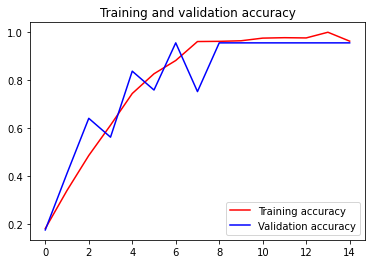

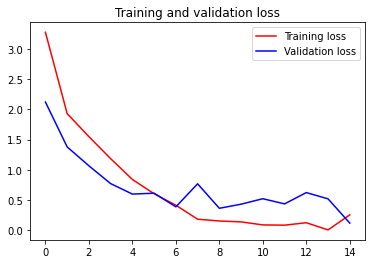

<Figure size 432x288 with 0 Axes>

In [ ]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()

plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend(loc=0) 
plt.figure()


plt.show()

print(train_generator)

In [ ]:
import numpy as np
from google.colab import files
from keras.preprocessing import image

uploaded = files.upload()

for fn in uploaded.keys():
 
  path = fn
  img = image.load_img(path, target_size=(150, 150))
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  print(fn)
  if classes[0][0] == 1.0 :
    print('Asam Jawa')
  elif classes[0][1] == 1.0:
    print('Kemiri')
  elif classes[0][2] == 1.0:
    print('Kayu Manis')
  elif classes[0][3] == 1.0:
    print('Daun Jeruk')
  elif classes[0][4] == 1.0:
    print('Cengkeh')
  elif classes[0][5] == 1.0:
    print('Jahe')
  elif classes[0][6] == 1.0:
    print('Keluak')
  elif classes[0][7] == 1.0:
    print('Ketumbar')
  elif classes[0][8] == 1.0:
    print('Kunyit')
  elif classes[0][9] == 1.0:
    print('Lada Hitam')
  elif classes[0][10] == 1.0:
    print('Pekak')
  elif classes[0][11] == 1.0:
    print('Salam')
  elif classes[0][12] == 1.0:
    print('Serai')

Saving 000.jpg to 000.jpg
000.jpg
Jahe


In [ ]:
export_dir = 'saved_model/'
tf.saved_model.save(model, export_dir)

INFO:tensorflow:Assets written to: saved_model/assets


In [ ]:
converter = tf.lite.TFLiteConverter.from_saved_model(export_dir)
tflite_model = converter.convert()

In [ ]:
import pathlib
tflite_model_file = pathlib.Path('model.tflite')
tflite_model_file.write_bytes(tflite_model)

76045924

In [ ]:
try:
    from google.colab import files
    files.download(tflite_model_file)
except:
    pass

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>